<a href="https://colab.research.google.com/github/shashwat1225/hello-world/blob/master/CashCoach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANSWER 1.1**



To calculate the correlation between variable spendings, we will follow these steps:


1.   Create another dataframe having spendings of variable amounts only
2.   Plot a scatter plot between the categories(level 2) and amount to visualise the spendings in each category
3.   Find correlation against each category and put that in a tabular form. (Dividing each spending with the maximum spending to check the percentage change)


After finding the correlations, we observe that the expenditure is mostly correlated with shops and coffee shops (positively), which means the expenditure goes up with time since the rate of shopping and sitting at coffee shops also goes up. However, with other categories we observe a negative correlation which means users are trying to cut down their expenditure their as the spending in other categories decreases with time.


**ANSWER 1.2**

To calculate the multi variate normality and check if the distribution is normal along with the null hypothesis check with p-value, we will use the pengouin library for Henze-Zirkler multivariate normality test. (ERROR)

Followed by which we performed Shapiro test and found the normality of the dataframe to be 0.15 and p value to be 0, which meant that the data is completely rejecting the null hypothesis


In [98]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [60]:
df = pd.read_excel("/content/sample_data/ML itw - dataset ex1.xlsx", sheet_name='Transactions')

In [61]:
df1=df.query('category_lvl1 == "variable"')
df1

,id,account_id,bankCode,cashcoachId,made_on,category_lvl2,category_lvl1,currency_code,amount,year,month,week
0,10000,Current_account,Revo,Revo_10000,2018-05-01,Coffee shops,variable,GBP,-7.80,2018,5,18
2,10002,Current_account,Revo,Revo_10002,2018-05-02,Coffee shops,variable,GBP,-5.24,2018,5,18
3,10003,Current_account,Revo,Revo_10003,2018-05-03,Coffee shops,variable,GBP,-7.09,2018,5,18
4,10004,Current_account,Revo,Revo_10004,2018-05-04,Coffee shops,variable,GBP,-9.10,2018,5,18
5,10005,Current_account,Revo,Revo_10005,2018-05-05,eating_out,variable,GBP,-73.66,2018,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...
962,10962,Current_account,Revo,Revo_10962,2020-03-28,Coffee shops,variable,GBP,-4.48,2020,3,13
963,10963,Current_account,Revo,Revo_10963,2020-03-29,Coffee shops,variable,GBP,-4.65,2020,3,14
964,10964,Current_account,Revo,Revo_10964,2020-03-30,Clothing,variable,GBP,-21.06,2020,3,14
965,10965,Current_account,Revo,Revo_10965,2020-03-30,eating_out,variable,GBP,-10.00,2020,3,14


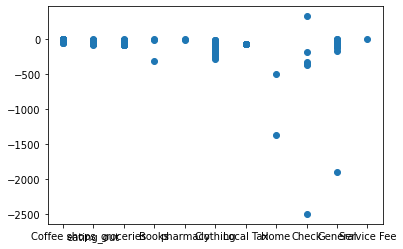

In [62]:
plt.scatter(df1['category_lvl2'],df1['amount'])

In [96]:
s_corr = df1.category_lvl2.str.get_dummies(sep=' ').corrwith(df1.amount/df1.amount.max())


In [97]:
s_corr

Books        -0.035858
Check        -0.362746
Clothing     -0.132417
Coffee        0.247163
Fee           0.009437
General      -0.131871
Home         -0.353641
Local        -0.052625
Service       0.009437
Tax          -0.052625
eating_out   -0.015402
groceries    -0.019130
pharmacy      0.010223
shops         0.247163
dtype: float64

In [106]:
df2 = df1[['amount','category_lvl2_num']]
df2

,amount,category_lvl2_num
0,-7.80,3
2,-5.24,3
3,-7.09,3
4,-9.10,3
5,-73.66,8
...,...,...
962,-4.48,3
963,-4.65,3
964,-21.06,2
965,-10.00,8


In [110]:
!pip install pingouin

     |████████████████████████████████| 225kB 2.8MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221688 sha256=bbb4e7cdbc0ba237d429e02cb5f73bd6bffdaa8a168e22ceab28a32c954409e3
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=8958850aeca06a9f1163e637d5cde2b8938cf554699f08822c11bd7707ba4775
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=799fb1e9d439ff7e59b16c7820d7de80060285d0d9428ae9a910d66bf8ae255a
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [113]:
import pingouin as pg
normal, p = pg.multivariate_normality(df2, alpha=0.05)

ValueError: ignored

In [116]:
from scipy.stats import shapiro

shapiro_results = shapiro(df2)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: (0.15417587757110596, 0.0)
P-value:  0.0


**ANSWER 2**

To start with the statistical modelling of the data, we will have to perform some exploratory data analyses on the given data, to refine and get more insights for a lower error rate. 

We commenced with performing missing value analysis and observed the data to be complete and have no missing values. 

Continuing further we tried to understand the data with visualisations and found where the spendings are increasing and decreasing. We also checked how the data is correlated to each other and converted the categories into integers in order to maintain same datatypes and see how well the data is correlated.
We were able to observe that the maximum amount was spent in coffee shops and Friday was the day of maximum expenses. 

We took "amount" to be our target variable since that is what we were trying to predict. Since it's an integer value, we will be going with regression analysis. 

To find the weekly expenses, we will have to find on what days was the money being spent, hence we used the variable "made_on" as our time stamp of expenses and found the weekdays using dt.dayofweek function. Followed by which we created a testing database of 6th day of the week (starting with 0), which came out to be Sunday. And our training data had expenses from Monday to Saturday's expenditures. 

Due to shortage of time and unfamiliarity with the VAR model, I was unable to create a prediction model and provide concrete insights. However, if considered, I would send this model latest by today evening to provide you with complete answers along with the answer of the 8th question. 

I understand it mmight not be considered in my technical round result, but it wouldn't be a problem.

Thank you for this opportunity.

In [65]:
mv=pd.DataFrame(df1.isnull().sum())
mv

,0
id,0
account_id,0
bankCode,0
cashcoachId,0
made_on,0
category_lvl2,0
category_lvl1,0
currency_code,0
amount,0
year,0


In [66]:
df1['weekday'] = df1['made_on'].dt.dayofweek


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
corr = df1.corr()
corr

,id,amount,year,month,week,weekday
id,1.000000,0.003207,0.912835,-0.208051,-0.198499,0.026450
amount,0.003207,1.000000,0.012160,-0.021118,-0.028138,-0.113888
year,0.912835,0.012160,1.000000,-0.570528,-0.565080,0.022838
month,-0.208051,-0.021118,-0.570528,1.000000,0.995595,-0.003555
week,-0.198499,-0.028138,-0.565080,0.995595,1.000000,-0.009914
weekday,0.026450,-0.113888,0.022838,-0.003555,-0.009914,1.000000


Text(0.5, 1.0, 'Correlations')

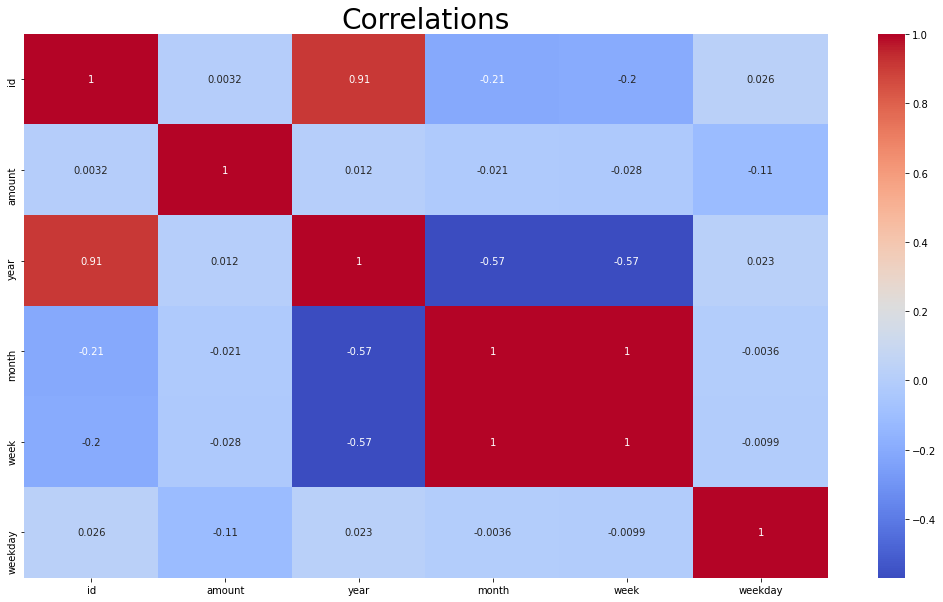

In [68]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.title('Correlations', size = 28)

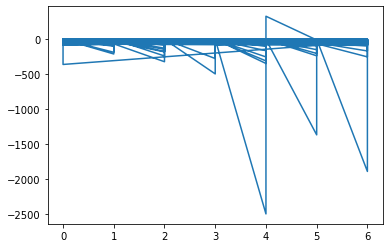

In [69]:
plt.plot(df1['weekday'],df1['amount'])
#plt.xlabel(df1_train['amount'])
#plt.ylabel(df1_train['weekday'])
plt.show()


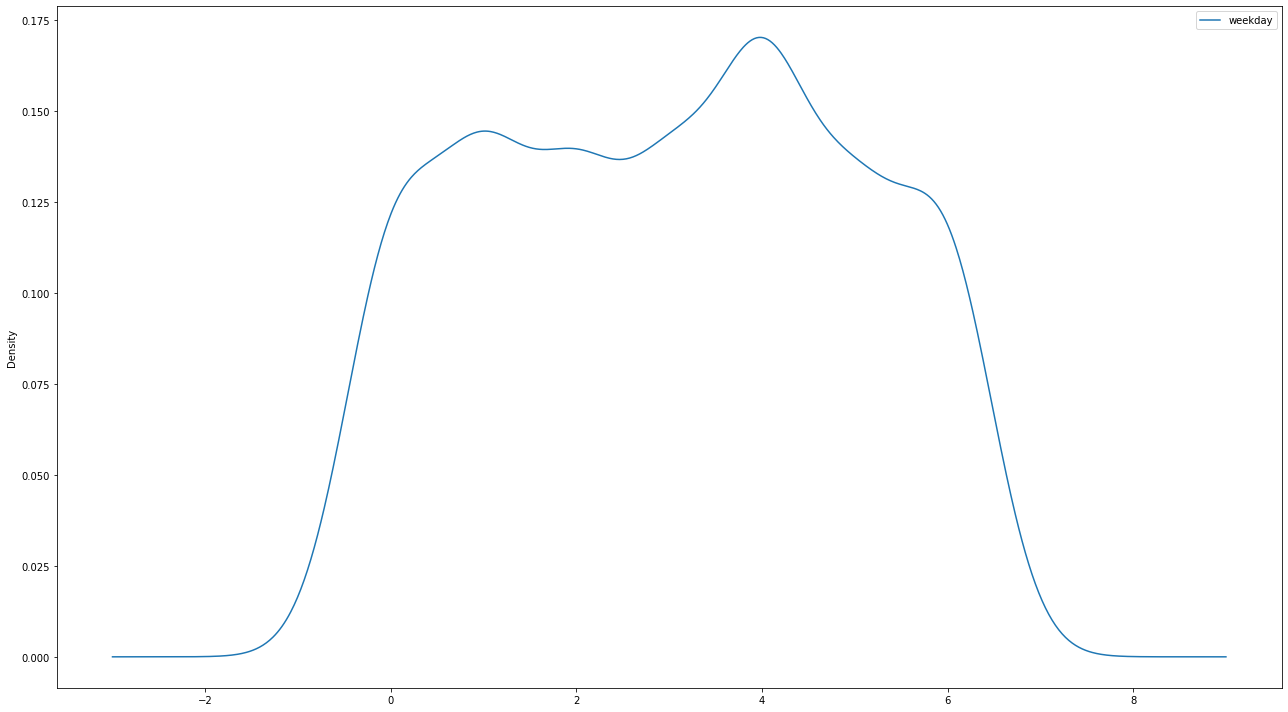

In [70]:
df1[['weekday']].plot.kde(figsize=(18,10),legend=True);
plt.tight_layout()

In [77]:
df1[['category_lvl2_num']] = df1[['category_lvl2']].apply(lambda col:pd.Categorical(col).codes)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [78]:
df1


,id,account_id,bankCode,cashcoachId,made_on,category_lvl2,category_lvl1,currency_code,amount,year,month,week,weekday,category_lvl2_num
0,10000,Current_account,Revo,Revo_10000,2018-05-01,Coffee shops,variable,GBP,-7.80,2018,5,18,1,3
2,10002,Current_account,Revo,Revo_10002,2018-05-02,Coffee shops,variable,GBP,-5.24,2018,5,18,2,3
3,10003,Current_account,Revo,Revo_10003,2018-05-03,Coffee shops,variable,GBP,-7.09,2018,5,18,3,3
4,10004,Current_account,Revo,Revo_10004,2018-05-04,Coffee shops,variable,GBP,-9.10,2018,5,18,4,3
5,10005,Current_account,Revo,Revo_10005,2018-05-05,eating_out,variable,GBP,-73.66,2018,5,18,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,10962,Current_account,Revo,Revo_10962,2020-03-28,Coffee shops,variable,GBP,-4.48,2020,3,13,5,3
963,10963,Current_account,Revo,Revo_10963,2020-03-29,Coffee shops,variable,GBP,-4.65,2020,3,14,6,3
964,10964,Current_account,Revo,Revo_10964,2020-03-30,Clothing,variable,GBP,-21.06,2020,3,14,0,2
965,10965,Current_account,Revo,Revo_10965,2020-03-30,eating_out,variable,GBP,-10.00,2020,3,14,0,8


In [79]:
df1['category_lvl2'].unique()

array(['Coffee shops', 'eating_out', 'groceries', 'Books', 'pharmacy',
       'Clothing', 'Local Tax', 'Home', 'Check', 'General', 'Service Fee'],
      dtype=object)

In [80]:
df1['category_lvl2_num'].unique()

array([ 3,  8,  9,  0, 10,  2,  6,  5,  1,  4,  7], dtype=int8)

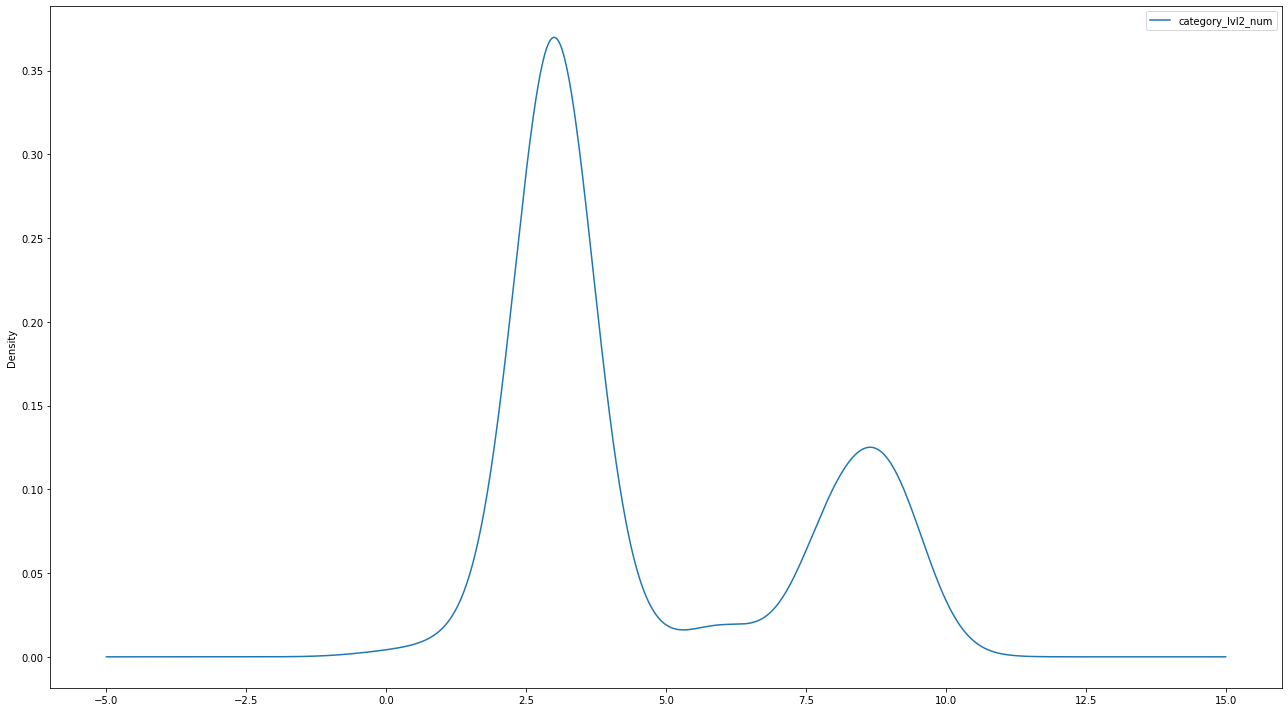

In [81]:
df1[['category_lvl2_num']].plot.kde(figsize=(18,10),legend=True);
plt.tight_layout()

In [31]:
df1_test=df1.query('weekday==6')
df1_test.set_index(['made_on'], inplace=True) 
df1_test

,id,account_id,bankCode,cashcoachId,category_lvl2,category_lvl1,currency_code,amount,year,month,week,weekday
made_on,,,,,,,,,,,,
2018-05-06,10006,Current_account,Revo,Revo_10006,groceries,variable,GBP,-41.85,2018,5,19,6
2018-05-13,10017,Current_account,Revo,Revo_10017,groceries,variable,GBP,-60.05,2018,5,20,6
2018-05-20,10028,Current_account,Revo,Revo_10028,groceries,variable,GBP,-40.20,2018,5,21,6
2018-05-27,10038,Current_account,Revo,Revo_10038,groceries,variable,GBP,-34.86,2018,5,22,6
2018-06-03,10048,Current_account,Revo,Revo_10048,groceries,variable,GBP,-57.46,2018,6,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08,10930,Current_account,Revo,Revo_10930,Coffee shops,variable,GBP,-5.25,2020,3,11,6
2020-03-15,10940,Current_account,Revo,Revo_10940,Coffee shops,variable,GBP,-13.92,2020,3,12,6
2020-03-22,10950,Current_account,Revo,Revo_10950,eating_out,variable,GBP,-25.00,2020,3,13,6


In [30]:
df1_train=df1.query('weekday != 6')
df1_train.set_index(['made_on'], inplace=True) 
df1_train

,id,account_id,bankCode,cashcoachId,category_lvl2,category_lvl1,currency_code,amount,year,month,week,weekday
made_on,,,,,,,,,,,,
2018-05-01,10000,Current_account,Revo,Revo_10000,Coffee shops,variable,GBP,-7.80,2018,5,18,1
2018-05-02,10002,Current_account,Revo,Revo_10002,Coffee shops,variable,GBP,-5.24,2018,5,18,2
2018-05-03,10003,Current_account,Revo,Revo_10003,Coffee shops,variable,GBP,-7.09,2018,5,18,3
2018-05-04,10004,Current_account,Revo,Revo_10004,Coffee shops,variable,GBP,-9.10,2018,5,18,4
2018-05-05,10005,Current_account,Revo,Revo_10005,eating_out,variable,GBP,-73.66,2018,5,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,10960,Current_account,Revo,Revo_10960,Coffee shops,variable,GBP,-6.44,2020,3,13,4
2020-03-28,10962,Current_account,Revo,Revo_10962,Coffee shops,variable,GBP,-4.48,2020,3,13,5
2020-03-30,10964,Current_account,Revo,Revo_10964,Clothing,variable,GBP,-21.06,2020,3,14,0
